# [__UCI Bank Marketing Dataset__](https://archive.ics.uci.edu/ml/datasets/bank+marketing#) - Classification Problem

### __Table of Contents__

1. Explore dataset
2. Feature Summary
3. Approach
4. Exploratory Data Analysis
5. Model Building
6. Model evaluation

### __Aim__
To analyse the input variables from the data set and build a model to __*classify*__ whether a candidate subscribes for a term deposit or not.

__Dataset__ - _bank-additional-full.csv_

### __Feature Summary__

|Variable|Description|Type|Unique values |
| :- |:-|:-:|:-|   
|age | age in years|numeric||
| job | type of job |categorical|admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown|
| education | education |categorical|basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown|
|marital | marital status |categorical|divorced, married, single, unknown|
| default| has credit in default? |categorical|no, yes, unknown|
 |housing| has housing loan? |categorical|no, yes, unknown|
 |loan| has personal loan? |categorical|no, yes, unknown|
 |contact| contact communication type |categorical|cellular, telephone| 
 |month| last contact month of year |categorical|jan,  feb,  mar,  ...,  nov,  dec|
 |day_of_week| last contact day of the week |categorical|mon, tue, wed, thu, fri|
 |duration| last contact duration, in seconds |numeric||
 |campaign| number of contacts performed during this campaign and for this client |numeric||
 |pdays| number of days that passed by after the client was last contacted from a previous campaign |numeric||
 |previous| number of contacts performed before this campaign and for this client |numeric||
 |poutcome| outcome of the previous marketing campaign |categorical|failure, nonexistent, success|
 |emp.var.rate| employment variation rate |numeric||
 |cons.price.idx| consumer price index |numeric||     
 |cons.conf.idx| consumer confidence index |numeric||     
 |euribor3m| euribor 3 month rate |numeric||
 |nr.employed| number of employees |numeric||
 |y | has the client subscribed a term deposit? |categorical|yes, no|

### __Approach__
   
   1. Explore the data 
      - Read the dataset using pandas library. Use *head(), info()* and *describe()*.  
   2. Clean the data
      - Check for missing/ null/ NaN values in the dataset. Impute values or delete records on a case by case basis. 
      - Check for skewness on numerical variables. Impute median values for NaNs, if the data is skewed. Otherwise mean values are sufficient.
   3. EDA 
      - Explore categorial variables using seaborn library's countplot.
      - Explore each variable on basis of the subscriber to non-subscriber ratio        
   4. Model building and evaluation
      - Convert categorical values(strings) to numeric
      - Split the dataset into train and test datasets
      - Define the classifiers from *sklearn* library
      - Fit the classifier on the training dataset
      - Predict the fitted model on the test dataset
      - Evaluate the model on the basis of Area under the Curve
      - Summarise the results
  

### __Libraries__

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
%matplotlib inline

### __Explore the dataset__

In [323]:
#Read the dataset
Banco = pd.read_csv('bank-additional-full.csv',sep=';')

In [324]:
Banco.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [325]:
Banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [326]:
Banco.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### __Exploratory Data Analysis__

In [327]:
#Check the missing/ NaN values for each column
Banco.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

> Missing values are reported as _unknown_ in the dataset. Hence, there are no NaNs. 

In [328]:
#Check the skewness - Numerical features only - sorted the absolute values
Banco.skew().abs().sort_values(ascending= False)

pdays             4.922190
campaign          4.762507
previous          3.832042
duration          3.263141
nr.employed       1.044262
age               0.784697
emp.var.rate      0.724096
euribor3m         0.709188
cons.conf.idx     0.303180
cons.price.idx    0.230888
dtype: float64

> All the economic indicators and *age* are mildly skewed. All the other remaining features hihgly skewed. 

#### __Custom Functions__

- Define *feature_ratio*, *feature_count* and *feature_count2* functions to extract the ratio of subscribers to non-subscribers for each unique value in a column. 
- Define *replace_unknown* function to impute/ replace unknowns in a column
- Define *range_count* to get the count of subcribers, non-subscribers and subscription ratio for a user-defined range in numerical features
- Define *stack_plot* to plot a stacked plot for a column on the target variable

In [329]:
#Feature ratio - Ratio of subscribers to non-subscribers for each unique value in a given column
def feature_ratio(colname):
    '''feature_ratio(colname)
    Feature ratio - Ratio of subscribers to non-subscribers for each unique value in a given column
    '''
    col_types = Banco[colname].dropna().unique()
    for col in col_types:
        a = Banco[(Banco[colname] == col) & (Banco['y'] == 'yes')][colname].count()
        b = Banco[(Banco[colname] == col) & (Banco['y'] == 'no')][colname].count()
        
        print col, " \t%.3f" % (a/float(b))

In [330]:
#Feature count - Count of subscribers and non-subscribers for each unique value in a given column
def feature_count(colname):
    '''feature_count(colname)
    Feature count - Count of subscribers and non-subscribers for each unique value in a given column
    '''
    x = []
    a = []
    b = []
    c = []
    
    col_types = Banco[colname].dropna().unique()
    
    for col in col_types:
        x.append(col)
        a.append(Banco[(Banco[colname] == col) & (Banco['y'] == 'yes')][colname].count())
        b.append(Banco[(Banco[colname] == col) & (Banco['y'] == 'no')][colname].count())
        
    c = [i/float(j) for i,j in zip(a, b)]
    print pd.DataFrame(list(zip(x,c,a,b)),columns=[colname,'Ratio','Yes' ,'No']).sort_values(by=['Ratio'], ascending= False)
       

In [331]:
#Feature count2 - Count of subscribers and non-subscribers for each unique value in two different columns
def feature_count2(colname1, colname2):
    '''feature_count(colname1, colname)
    Feature count - Count of subscribers and non-subscribers for each unique value in two different columns
    '''
    col_type1 = Banco[colname1].dropna().unique()
    col_type2 = Banco[colname2].dropna().unique()
    print colname1,"\tDay\tYes\tNo\tRatio"
    print "--------------------------------------"
    for col1 in col_type1:
        for col2 in col_type2:
            
            a = Banco[(Banco[colname1] == col1) & (Banco[colname2] == col2) & (Banco['y'] == 'yes')][colname1].count()
            b = Banco[(Banco[colname1] == col1) & (Banco[colname2] == col2) & (Banco['y'] == 'no')][colname1].count()
        
            print col1,"\t",col2, "\t",a,"\t", b, "\t%.3f" % (a/float(b))
        print "--------------------------------------"

In [332]:
#Function to impute unknown with Mode.
def replace_unknown(var, col):
    '''replace_unknown(var, col)
    Function to impute 'unknown' with Mode.
    '''
    if var == 'unknown':
        #Index is used to pick the string from the series
        return Banco[col].mode()[0] 
    else:
        return var

In [333]:
#Function to get the count of subcribers, non-subscribers and subscription ratio for a user-defined range in numerical features
def range_count(start, end, split, col_name):
    '''range_count(start, end, split, col_name)
    Function to get the count of subcribers, non-subscribers and subscription ratio for a user-defined range in numerical features
    '''
    print "Range\t\tRatio\tYes\tNo"
    print "----------------------------------"
    num = np.arange(start,end+1,split)
    for i in range(len(num)):
        
        if i==0:
            pass
        else:        
            a = Banco[(Banco[col_name] > num[i-1]) & (Banco[col_name] < num[i]) & (Banco['y'] == 'yes')][col_name].count()
            b = Banco[(Banco[col_name] > num[i-1]) & (Banco[col_name] < num[i]) & (Banco['y'] == 'no')][col_name].count()
            if b == 0:
                print num[i-1],"-",num[i],"\t",np.nan,"\t" ,a,"\t", b
            else:
                print num[i-1],"-",num[i],"  \t%.3f" % (a/float(b)),"\t" ,a,"\t", b

In [334]:
#Function to plot the stacked plot for a column
def stack_plot(col_name, target, nbins):
    '''stack_plot(col_name, target, nbins)
    Function to plot the stacked plot for a column
    '''
    dct = {}
    for name in Banco[target].unique():
        dct[name] = Banco.groupby(target).get_group(name)[col_name]
    
    pd.DataFrame(dct).plot.hist(stacked=True, bins = nbins)
    

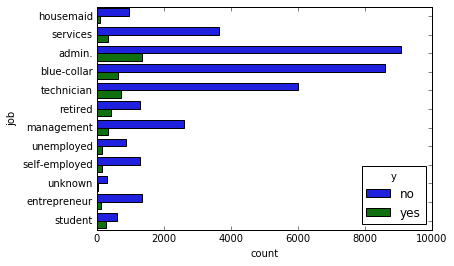

In [335]:
#Distribution of unique values of Job feature on the target variable
sns.countplot(y = Banco['job'], hue = Banco['y'])

In [336]:
feature_count('job')

              job     Ratio   Yes    No
11        student  0.458333   275   600
5         retired  0.337481   434  1286
7      unemployed  0.165517   144   870
2          admin.  0.149063  1352  9070
6      management  0.126348   328  2596
9         unknown  0.126280    37   293
4      technician  0.121404   730  6013
8   self-employed  0.117138   149  1272
0       housemaid  0.111111   106   954
10   entrepreneur  0.093093   124  1332
1        services  0.088590   323  3646
3     blue-collar  0.074048   638  8616


> People with Admin jobs have the highest subscription (1389 subscriptions). Also, students and retired people have high subcription ratio. 

In [337]:
#Impute unknowns with Mode 
Banco['job'] = Banco['job'].apply(lambda x: replace_unknown(x,'job'))

In [338]:
#Check if there is any change in ratios after imputing mode
feature_count('job')

              job     Ratio   Yes    No
10        student  0.458333   275   600
5         retired  0.337481   434  1286
7      unemployed  0.165517   144   870
2          admin.  0.148350  1389  9363
6      management  0.126348   328  2596
4      technician  0.121404   730  6013
8   self-employed  0.117138   149  1272
0       housemaid  0.111111   106   954
9    entrepreneur  0.093093   124  1332
1        services  0.088590   323  3646
3     blue-collar  0.074048   638  8616


> There is not a lot of change in the yes/no ratio for the Admin jobs after the replacement

In [339]:
Banco['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

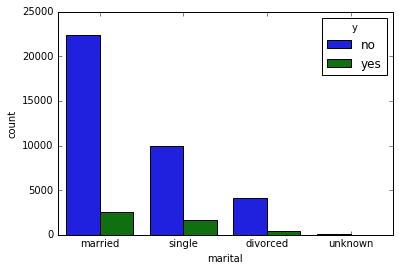

In [340]:
sns.countplot(x = Banco['marital'], hue = Banco['y'])

In [341]:
feature_count('marital')

    marital     Ratio   Yes     No
3   unknown  0.176471    12     68
1    single  0.162847  1620   9948
2  divorced  0.115087   476   4136
0   married  0.113056  2532  22396


> People who are _Single_ have a better subscription ratio compared to others.   

In [342]:
#Impute unknowns with Mode in marital column
Banco['marital'] = Banco['marital'].apply(lambda x: replace_unknown(x,'marital'))

In [343]:
feature_count('marital')

    marital     Ratio   Yes     No
1    single  0.162847  1620   9948
2  divorced  0.115087   476   4136
0   married  0.113248  2544  22464


> Again, no significant change noticed in the ratio after replacement

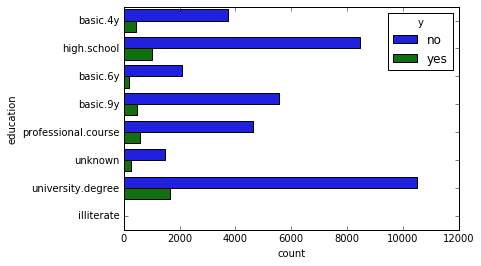

In [344]:
sns.countplot(y = Banco['education'], hue = Banco['y']) 

> University Degree and High School completed people have high subscriptions 

In [345]:
feature_count('education')    

             education     Ratio   Yes     No
7           illiterate  0.285714     4     14
5              unknown  0.169595   251   1480
6    university.degree  0.159078  1670  10498
4  professional.course  0.128012   595   4648
1          high.school  0.121523  1031   8484
0             basic.4y  0.114194   428   3748
2             basic.6y  0.089354   188   2104
3             basic.9y  0.084889   473   5572


There are ~1700 unknowns for the education column. We will consider _unknown_ as another unique value.

> In addition to these, Professional course completed students also have good subscription rates. Illiterates have the highest ratio, but the frequency is low. 

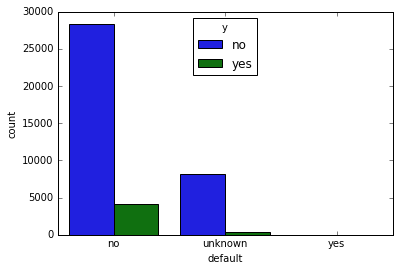

In [346]:
sns.countplot(x=Banco['default'], hue=Banco['y'])

In [347]:
feature_count('default')

   default     Ratio   Yes     No
0       no  0.147829  4197  28391
1  unknown  0.054329   443   8154
2      yes  0.000000     0      3


> A lot of samples are unknown. However, only 3 samples have defaulted. 

Since the *unknown* values are around 8600, imputing mode for the unknowns in this column can alter the model fit. We can let the unknown be a another unique value for this column.

In [348]:
Banco['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [349]:
Banco[Banco['default']=='yes']['y']

21580    no
21581    no
24866    no
Name: y, dtype: object

> All 3 cases of loan defaulters did not subscribe. Possibly, no savings -> no subscription? 

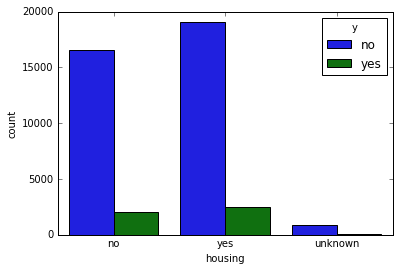

In [352]:
sns.countplot(x = Banco['housing'], hue=Banco['y'])

In [353]:
feature_count('housing')

   housing     Ratio   Yes     No
1      yes  0.131470  2507  19069
0       no  0.122078  2026  16596
2  unknown  0.121178   107    883


Since there are around 1000 records of unknowns, we will not impute the mode.

> People with housing loan have a slightly higher subscription rate compare to ones without.

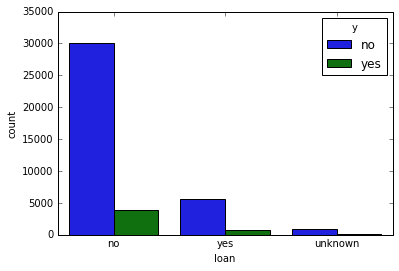

In [354]:
sns.countplot(x=Banco['loan'], hue=Banco['y'])

In [355]:
feature_count('loan')

      loan     Ratio   Yes     No
0       no  0.127907  3850  30100
1      yes  0.122731   683   5565
2  unknown  0.121178   107    883


> Subscription ratio is same for all three values. Non-loan takers have slightly better ratio.

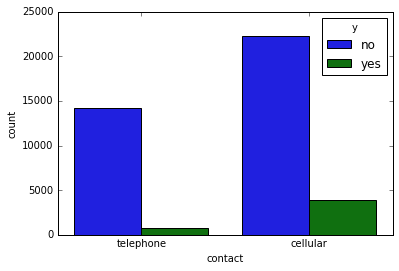

In [356]:
sns.countplot(x=Banco['contact'], hue=Banco['y'])

In [357]:
feature_count('contact')

     contact     Ratio   Yes     No
1   cellular  0.172850  3853  22291
0  telephone  0.055201   787  14257


 > Cellular contact to users resulted in a relatively better subcription

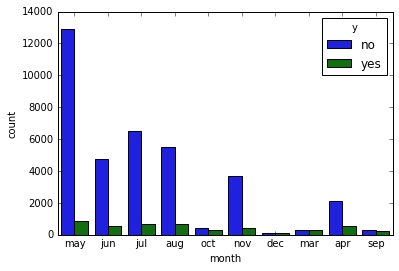

In [359]:
sns.countplot(x=Banco['month'], hue= Banco['y'])

> _May_ has the highest number of subscriptions and non-takers as well

In [360]:
feature_count('month')

  month     Ratio  Yes     No
7   mar  1.022222  276    270
6   dec  0.956989   89     93
9   sep  0.815287  256    314
4   oct  0.781638  315    403
8   apr  0.257525  539   2093
3   aug  0.118595  655   5523
1   jun  0.117462  559   4759
5   nov  0.112890  416   3685
2   jul  0.099464  649   6525
0   may  0.068773  886  12883


> Mar, Dec, Sep, Oct have better subscription ratios. However, the volumes are very less.

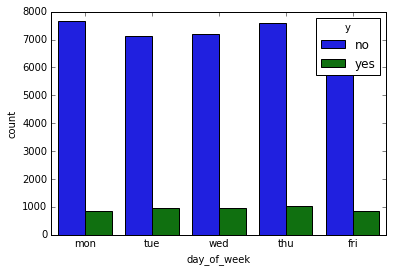

In [361]:
sns.countplot(x=Banco['day_of_week'], hue=Banco['y'])

In [362]:
feature_count('day_of_week')

  day_of_week     Ratio   Yes    No
3         thu  0.137899  1045  7578
1         tue  0.133529   953  7137
2         wed  0.132081   949  7185
4         fri  0.121186   846  6981
0         mon  0.110473   847  7667


> Subscription ratios are good mid-week i.e., Tuesday to Thursday

In [266]:
#Compare the subscription ratios for  month and Day_of_week columns. 
#To see if there is any pattern for weekday in every month
feature_count2('month','day_of_week')

month 	Day	Yes	No	Ratio
--------------------------------------
may 	mon 	191 	2451 	0.078
may 	tue 	149 	2660 	0.056
may 	wed 	186 	2737 	0.068
may 	thu 	161 	2376 	0.068
may 	fri 	199 	2659 	0.075
--------------------------------------
jun 	mon 	136 	1115 	0.122
jun 	tue 	125 	845 	0.148
jun 	wed 	118 	865 	0.136
jun 	thu 	91 	876 	0.104
jun 	fri 	89 	1058 	0.084
--------------------------------------
jul 	mon 	120 	1396 	0.086
jul 	tue 	133 	1384 	0.096
jul 	wed 	135 	1322 	0.102
jul 	thu 	143 	1529 	0.094
jul 	fri 	118 	894 	0.132
--------------------------------------
aug 	mon 	107 	1115 	0.096
aug 	tue 	148 	1148 	0.129
aug 	wed 	147 	1096 	0.134
aug 	thu 	131 	1216 	0.108
aug 	fri 	122 	948 	0.129
--------------------------------------
oct 	mon 	42 	87 	0.483
oct 	tue 	67 	82 	0.817
oct 	wed 	63 	72 	0.875
oct 	thu 	74 	89 	0.831
oct 	fri 	69 	73 	0.945
--------------------------------------
nov 	mon 	67 	699 	0.096
nov 	tue 	90 	724 	0.124
nov 	wed 	84 	779 	0.108
nov 	thu 	92 	

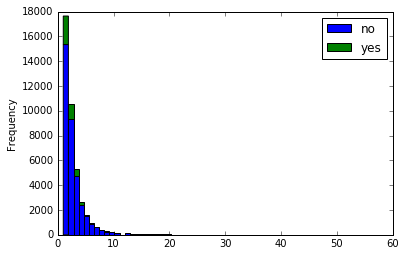

In [366]:
#Plot a stacked plot 
stack_plot('campaign','y', 60)

In [369]:
range_count(0,60,2,'campaign')

Range		Ratio	Yes	No
----------------------------------
0 - 2   	0.150 	2300 	15342
2 - 4   	0.120 	574 	4767
4 - 6   	0.081 	120 	1479
6 - 8   	0.064 	38 	591
8 - 10   	0.064 	17 	266
10 - 12   	0.073 	12 	165
12 - 14   	0.045 	4 	88
14 - 16   	0.041 	2 	49
16 - 18   	0.074 	4 	54
18 - 20   	0.000 	0 	26
20 - 22   	0.000 	0 	24
22 - 24   	0.067 	1 	15
24 - 26   	0.000 	0 	8
26 - 28   	0.000 	0 	11
28 - 30   	0.000 	0 	10
30 - 32   	0.000 	0 	7
32 - 34   	0.000 	0 	4
34 - 36   	0.000 	0 	5
36 - 38   	0.000 	0 	1
38 - 40   	0.000 	0 	1
40 - 42   	0.000 	0 	1
42 - 44   	0.000 	0 	2
44 - 46 	nan 	0 	0
46 - 48 	nan 	0 	0
48 - 50 	nan 	0 	0
50 - 52 	nan 	0 	0
52 - 54 	nan 	0 	0
54 - 56 	nan 	0 	0
56 - 58 	nan 	0 	0
58 - 60 	nan 	0 	0


> Ratio is more when the number of times contacted is below 5. Infact, the subscribers are maximum when the contacted once. If the contact is more than 20, usually the subscription is not taken (Only single outlier). 

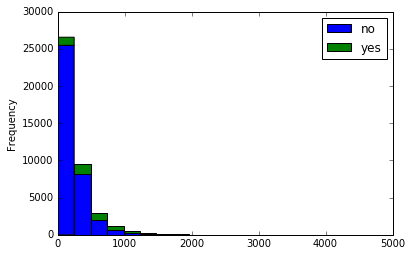

In [269]:
stack_plot('duration','y',20)

In [370]:
#Distribution of duration column
range_count(0,5000,250,'duration')

Range		Ratio	Yes	No
----------------------------------
0 - 250   	0.043 	1116 	25747
250 - 500   	0.179 	1409 	7879
500 - 750   	0.508 	963 	1896
750 - 1000   	1.043 	563 	540
1000 - 1250   	1.301 	294 	226
1250 - 1500   	1.621 	141 	87
1500 - 1750   	1.941 	66 	34
1750 - 2000   	1.190 	25 	21
2000 - 2250   	2.429 	17 	7
2250 - 2500   	2.000 	8 	4
2500 - 2750   	5.000 	5 	1
2750 - 3000   	2.000 	2 	1
3000 - 3250   	3.000 	3 	1
3250 - 3500   	0.000 	0 	5
3500 - 3750   	2.000 	2 	1
3750 - 4000   	0.000 	0 	1
4000 - 4250 	nan 	1 	0
4250 - 4500 	nan 	0 	0
4500 - 4750 	nan 	0 	0
4750 - 5000   	0.000 	0 	1


> 500-1500 call duration range indicates good conversion i.e., good subscription. Beyond that range, the frequency is low to have any significance

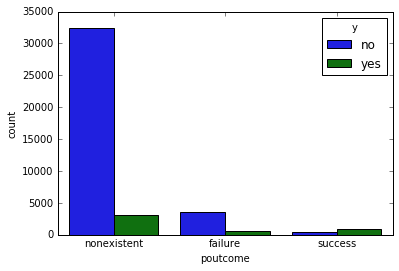

In [271]:
sns.countplot(x = Banco['poutcome'], hue=Banco['y'])

In [272]:
feature_count('poutcome')

      poutcome     Ratio   Yes     No
2      success  1.866388   894    479
1      failure  0.165890   605   3647
0  nonexistent  0.096879  3141  32422


> For fresh campaign, it was not very successful. For previously successful campaigns, subscription rates are good

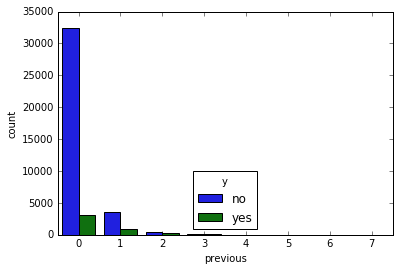

In [273]:
sns.countplot(x=Banco['previous'], hue=Banco['y'])

In [274]:
feature_count('previous')

   previous     Ratio   Yes     No
5         5  2.600000    13      5
6         6  1.500000     3      2
3         3  1.454545   128     88
4         4  1.187500    38     32
2         2  0.866337   350    404
1         1  0.269060   967   3594
0         0  0.096879  3141  32422
7         7  0.000000     0      1


> Maximum subscribers are fresh. They have not been contacted previously. People subsribe better if the previous contact is more than or equal to 2 days. The frequency is low, though, for more than 2 days.

In [371]:
#Total number of subscribers and non-subscribers for the given dataset
Banco['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [372]:
#Percentage of subscribers in the data set
print "%0.4f" % (4640/float(4640+36548))

0.1127


> 11.27% - Subscribers 88.73% of non-subscribers - Dataset is __imbalanced__

### __Model Building__

We will model the training dataset with these classifiers
- Logistic Regression
- Random Forest
- XGBoost

#### __Convert the categorical values to numeric values__

_scikit-learn_ models do not work with categorial variables(String). Hence, converting them to numeric values.  

In [373]:
#Convert categorical values to numeric for each categorical feature
for col in Banco.columns:
    if Banco[col].dtype == object:
        Banco[col] = Banco[col].astype('category').cat.codes

In [375]:
#Check the dataset to see the changed dataset
Banco.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [445]:
#Define function to get all the model metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
def model_metrics(X_test,y_test,y_model,obj):
    
    conf = confusion_matrix(y_test, y_model)
    tp = conf[0][0]
    fn = conf[1][0]
    tn = conf[1][1]
    fp = conf[0][1]
    
    sens = tp/float(tp+fn)
    spec = tn/float(tn+fp)
    mcc = (tp*tn - fp*fn)/float((tp+fp)*(tp+fn)*(fp+tn)*(tn+fn))**0.5
    
        
    
    y_pred_proba = obj.predict_proba(X_test)[::,1]
    fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    
    
    print "Classifier:",obj
    print "----------------------------------------------------------------------------"
    print "Accuracy\t\t: %0.4f" % accuracy_score(y_test, y_model)
    print "Sensitivity\t\t: %0.4f" % sens
    print "Specificity\t\t: %0.4f" % spec
    print "Matthews Corr. Coeff.\t: %0.4f" % mcc
    print "----------------------------------------------------------------------------"
    print "Confusion Matrix: \n", conf
    print "----------------------------------------------------------------------------"
    print "Classification Report: \n",classification_report(y_test, y_model)
    print "----------------------------------------------------------------------------"
    
    plt.title('Receiver Operating Characteristic Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'best')
    plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    

#### __Predictor, Taget variables__

In [446]:
#Define the predictors and the target variable. No column is being dropped from the predictors.
X = Banco.drop('y', axis=1)
y = Banco['y']

#### __Split the data__

In [447]:
#Split the data in 70:30 train-test ratio. We will train the model on X-train, y_train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [448]:
#Check the size of the training data
X_train.shape

(28831, 20)

#### __Logistic Regression__

In [449]:
from sklearn.linear_model import LogisticRegression

In [500]:
#Define classifier
lr = LogisticRegression(random_state=101)

In [501]:
#Fit the model on training set
model_lr = lr.fit(X_train, y_train)

In [502]:
#Predict on the test set 
pred_lr = model_lr.predict(X_test)

Classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------------------------------------------------------------------------
Accuracy		: 0.9091
Sensitivity		: 0.9264
Specificity		: 0.6596
Matthews Corr. Coeff.	: 0.4585
----------------------------------------------------------------------------
Confusion Matrix: 
[[10705   273]
 [  850   529]]
----------------------------------------------------------------------------
Classification Report: 
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     10978
          1       0.66      0.38      0.49      1379

avg / total       0.90      0.91      0.90     12357

----------------------------------------------------------------------------


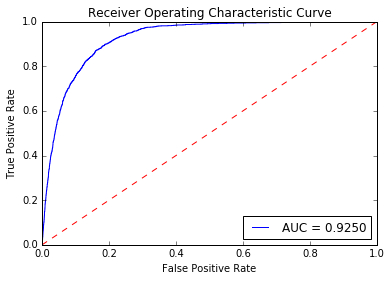

In [503]:
model_metrics(X_test,y_test, pred_lr, model_lr)

In [468]:
#Get the importance of each feature 
def feature_imp(obj):
    print pd.DataFrame(obj.feature_importances_,index = Banco.drop('y', axis=1).columns, columns=['imp']).sort_values('imp', ascending = False)

In [469]:
feature_imp(model_rf)

                     imp
duration        0.318308
euribor3m       0.109813
age             0.094466
nr.employed     0.066805
pdays           0.048765
job             0.046629
education       0.044428
day_of_week     0.039977
campaign        0.039871
cons.conf.idx   0.031380
cons.price.idx  0.029143
marital         0.024690
housing         0.019158
poutcome        0.017385
month           0.015425
loan            0.014822
default         0.010316
contact         0.010231
previous        0.009888
emp.var.rate    0.008498


> As mentioned in the dataset summary, __duration__ has the largest importance

#### __Oversampling with SMOTE __

 The target variable is heavily skewed. We will perform SMOTE to oversample the training dataset. 

In [470]:
from imblearn.over_sampling import SMOTE

In [506]:
#define the SMOTE object
sm = SMOTE(random_state=101)

In [507]:
#Fit the sample on the training dataset
X_sm, y_sm = sm.fit_sample(X_train,y_train)

In [508]:
#Check the fitted sample
X_sm, y_sm

(array([[ 4.00000000e+01,  9.00000000e+00,  1.00000000e+00, ...,
         -3.64000000e+01,  4.86000000e+00,  5.19100000e+03],
        [ 2.50000000e+01,  3.00000000e+00,  2.00000000e+00, ...,
         -4.27000000e+01,  4.96200000e+00,  5.22810000e+03],
        [ 4.80000000e+01,  1.00000000e+00,  1.00000000e+00, ...,
         -4.18000000e+01,  4.95900000e+00,  5.22810000e+03],
        ...,
        [ 2.95824629e+01,  0.00000000e+00,  2.00000000e+00, ...,
         -4.63310541e+01,  1.33355271e+00,  5.09910000e+03],
        [ 2.80949479e+01,  5.52526035e+00,  1.09494793e+00, ...,
         -3.05462553e+01,  7.13543541e-01,  5.01666446e+03],
        [ 6.08137480e+01,  4.96895800e+00,  1.00000000e+00, ...,
         -3.14682924e+01,  8.66015492e-01,  5.07620000e+03]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int8))

In [498]:
#Size of the training set after SMOTE
X_sm.shape, y_sm.shape

((51140, 20), (51140,))

In [497]:
#Count of subscribers in Train set after SMOTE
np.count_nonzero(y_sm == 1)

25570

#### __Logistic Regression with SMOTE on training dataset__

In [476]:
#Define classifier
lr_sm = LogisticRegression()

In [477]:
#Fit the model on SMOTE modified training set
model_lr_sm = lr_sm.fit(X_sm, y_sm)

##### __kFold Cross Validation__

Perform a kFold Cross validation on the model to see if the model is overfitting the data. Applying SMOTE can sometimes overfit the model.

In [478]:
from sklearn.model_selection import cross_val_score
cvs_lr_sm = cross_val_score(model_lr_sm, X_sm, y_sm, cv=5, n_jobs=3).mean()

In [479]:
print "%0.4f" % cvs_lr_sm

0.8637


> Validation accuracy is 86.37%

In [480]:
#Prediction on the test set
pred_lr_sm = model_lr_sm.predict(X_test)

Classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------------------------------------------------------------------------
Accuracy		: 0.8555
Sensitivity		: 0.9811
Specificity		: 0.4276
Matthews Corr. Coeff.	: 0.5434
----------------------------------------------------------------------------
Confusion Matrix: 
[[9374 1604]
 [ 181 1198]]
----------------------------------------------------------------------------
Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.85      0.91     10978
          1       0.43      0.87      0.57      1379

avg / total       0.92      0.86      0.88     12357

----------------------------------------------------------------------------


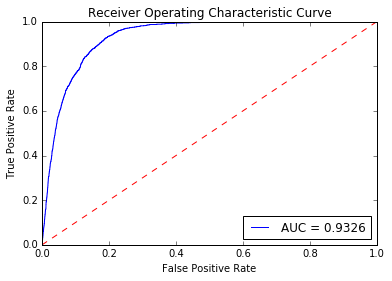

In [505]:
#Model Evaluation
model_metrics(X_test,y_test, pred_lr_sm, model_lr_sm)

#### __Random Forest Classifier__

In [463]:
from sklearn.ensemble import RandomForestClassifier

In [493]:
#Define the classifier - 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=101)

In [494]:
#Fit the model on training set
model_rf = rf.fit(X_train, y_train)

In [495]:
# Predict the outcome
pred_rf = model_rf.predict(X_test)

Classifier: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)
----------------------------------------------------------------------------
Accuracy		: 0.9137
Sensitivity		: 0.9391
Specificity		: 0.6455
Matthews Corr. Coeff.	: 0.5226
----------------------------------------------------------------------------
Confusion Matrix: 
[[10598   380]
 [  687   692]]
----------------------------------------------------------------------------
Classification Report: 
             precision    recall  f1-score   support

          0       0.94      0.97      0.95     10978
          1       0.65      0.50      0.56      1379

avg / total       0

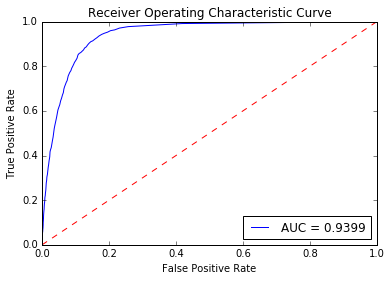

In [504]:
#Model Evaluation
model_metrics(X_test,y_test, pred_rf, model_rf)

#### __XGBoost Classifier__

In [482]:
from xgboost import XGBClassifier 

In [483]:
#MDefine classifier
xgb = XGBClassifier(learning_rate=0.05, colsample_bylevel=1,colsample_bytree=0.8, max_depth=6, max_delta_step=0.9, n_estimators=300, scale_pos_weight=1, reg_lambda=0.1)

In [484]:
#Fit the model on training set
model_xgb = xgb.fit(X_train, y_train)

In [485]:
#Predict the values for the test set
pred_xgb = model_xgb.predict(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Classifier: XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.05, max_delta_step=0.9, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=0.1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
----------------------------------------------------------------------------
Accuracy		: 0.9168
Sensitivity		: 0.9447
Specificity		: 0.6501
Matthews Corr. Coeff.	: 0.5529
----------------------------------------------------------------------------
Confusion Matrix: 
[[10569   409]
 [  619   760]]
----------------------------------------------------------------------------
Classification Report: 
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     10978
          1       0.65      0.55      0.60      1379

avg / total       0.91      0.92      0.91     12357

-----------------------------------

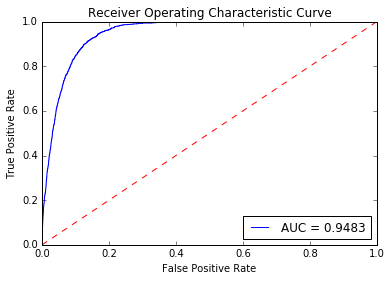

In [486]:
#Model Evaluation
model_metrics(X_test,y_test, pred_xgb, model_xgb)

### __Summary__

| Classifier | Accuracy | AUC |
|------|------|------|------|
| Logistic Regression  | 0.9091| 0.9250|
| Logistic Regression + SMOTE | 0.8555| 0.9326|
| Random Forest | 0.9137| 0.9399|
| XGBoost | 0.9168| 0.9483|

- Based on the table above we find that both in terms of *accuracy* and *Area Under the Curve (AUC)*, __XGBoost__ model performs well, followed closely by Random Forest.
- Logistic Regression with SMOTE gives better AUC, however, performs worse when compared to Logistic regression in terms of accuracy. 

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.cross_validation import train_test_split

FILE_PATH = 'C:/Users/campus/Downloads/TensorFlow_Tutorials/bank_normalised.csv'           # Path to .csv dataset
raw_data = pd.read_csv(FILE_PATH)                  # Open raw .csv

print("Raw data loaded successfully...\n")
#------------------------------------------------------------------------------
# Variables

Y_LABEL = 'y'                                          # Name of the variable to be predicted
KEYS = [i for i in raw_data.keys().tolist() if i != Y_LABEL]# Name of predictors
N_INSTANCES = raw_data.shape[0]                        # Number of instances
N_INPUT = raw_data.shape[1] - 1                        # Input size
N_CLASSES = raw_data[Y_LABEL].unique().shape[0]        # Number of classes (output size)
TEST_SIZE = 0.1                                          # Test set size (% of dataset)
TRAIN_SIZE = int(N_INSTANCES * (1 - TEST_SIZE))         # Train size
LEARNING_RATE = 0.001                                 # Learning rate
TRAINING_EPOCHS = 4000                                   # Number of epochs
BATCH_SIZE = 100                                        # Batch size
DISPLAY_STEP = 20                                     # Display progress each x epochs
HIDDEN_SIZE = 200                                     # Number of hidden neurons 256
ACTIVATION_FUNCTION_OUT = tf.nn.tanh                          # Last layer act fct
STDDEV = 0.1                                           # Standard deviation (for weights random init)
RANDOM_STATE = 100
print("Variables loaded successfully...\n")
print("Number of predictors \t%s" %(N_INPUT))
print("Number of classes \t%s" %(N_CLASSES))
print("Number of instances \t%s" %(N_INSTANCES))
print("\n")
print("Metrics displayed:\tPrecision\n")
#------------------------------------------------------------------------------
# Loading data

# Load data
X1 = raw_data[KEYS].get_values()                 # X data
y = raw_data[Y_LABEL].get_values()              # y data

X = raw_data.drop('y',axis=1).values
print(type(X))
print(type(X1))


# One hot encoding for labels
labels_ = np.zeros((N_INSTANCES, N_CLASSES))
labels_[np.arange(N_INSTANCES), labels] = 1

y = labels_

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = TEST_SIZE,random_state = 101)

print("Data loaded and splitted successfully...\n")
#------------------------------------------------------------------------------
# Neural net construction

# Net params
n_input = N_INPUT                   # input n labels
n_hidden_1 = HIDDEN_SIZE            # 1st layer
n_hidden_2 = HIDDEN_SIZE            # 2nd layer
n_hidden_3 = HIDDEN_SIZE            # 3rd layer
n_hidden_4 = HIDDEN_SIZE            # 4th layer
n_classes = N_CLASSES               # output m classes

# Tf placeholders
X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
dropout_keep_prob = tf.placeholder(tf.float32)


def mlp(_X, _weights, _biases, dropout_keep_prob):
    layer1 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])), dropout_keep_prob)
    layer2 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer1, _weights['h2']), _biases['b2'])), dropout_keep_prob)
    layer3 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer2, _weights['h3']), _biases['b3'])), dropout_keep_prob)
    layer4 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer3, _weights['h4']), _biases['b4'])), dropout_keep_prob)
    out = ACTIVATION_FUNCTION_OUT(tf.add(tf.matmul(layer4, _weights['out']), _biases['out']))
    return out

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=STDDEV)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=STDDEV)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3],stddev=STDDEV)),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4],stddev=STDDEV)),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes],stddev=STDDEV)),                                   
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Build model
pred = mlp(X, weights, biases, dropout_keep_prob)

# Loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)) # softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE).minimize(cost)

# Accuracy
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                                    
print("Net built successfully...\n")
print("Starting training...\n")
#------------------------------------------------------------------------------
# Training

# Initialize variables
init_all = tf.initialize_all_variables()

# Launch session
sess = tf.Session()
sess.run(init_all)

# Training loop
for epoch in range(TRAINING_EPOCHS):
    avg_cost = 0.
    total_batch = int(data_train.shape[0] / BATCH_SIZE)
    # Loop over all batches
    for i in range(total_batch):
        randidx = np.random.randint(int(TRAIN_SIZE), size = BATCH_SIZE)
        batch_xs = X_train[randidx, :]
        batch_ys = y_train[randidx, :]
        #print(batch_xs.shape)
        #print(batch_ys.shape)
        # Fit using batched data
        sess.run(optimizer, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob: 0.9})
        # Calculate average cost
        avg_cost += sess.run(cost, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob:1.})/total_batch
    # Display progress
    if epoch % DISPLAY_STEP == 0:
        print ("Epoch: %04d/%04d cost: %.9f" % (epoch, TRAINING_EPOCHS, avg_cost))
        train_acc = sess.run(accuracy, feed_dict={X: batch_xs, y: batch_ys, dropout_keep_prob:1.})
        print ("Training accuracy: %.3f" % (train_acc))


print ("End of training.\n")
print("Testing...\n")
#------------------------------------------------------------------------------
# Testing

test_acc = sess.run(accuracy, feed_dict={X: data_test, y: labels_test, dropout_keep_prob:1.})
print ("Test accuracy: %.3f" % (test_acc))

sess.close()
print("Session closed!")

In [3]:
a

3